In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import datetime as dt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import plotly
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.api import Holt
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot
import folium
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import ShuffleSplit


from scipy import fft
from scipy import signal as sig
import math

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("covid.csv")
data.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [3]:
df = data.drop(['Country_code'], axis=1)
df['Total_cases'] = df['Cumulative_cases'] + df['New_cases']
df['Active_cases'] = df['Total_cases'] - (df['New_cases'] + df['New_deaths'])
df["Date_reported"] = pd.to_datetime(df["Date_reported"])
df['timestamp_trunc'] = df['Date_reported'].dt.floor('D')
df["Date_reported"] = df["Date_reported"].map(dt.datetime.toordinal)
df = df[df["Country"]=="Afghanistan"]
df.tail(10).style.background_gradient(cmap="Reds")

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Total_cases,Active_cases,timestamp_trunc
1397,738824,Afghanistan,EMRO,50,227644,0,7953,227694,227644,2023-10-31 00:00:00
1398,738825,Afghanistan,EMRO,55,227699,2,7955,227754,227697,2023-11-01 00:00:00
1399,738826,Afghanistan,EMRO,64,227763,1,7956,227827,227762,2023-11-02 00:00:00
1400,738827,Afghanistan,EMRO,49,227812,0,7956,227861,227812,2023-11-03 00:00:00
1401,738828,Afghanistan,EMRO,69,227881,0,7956,227950,227881,2023-11-04 00:00:00
1402,738829,Afghanistan,EMRO,4,227885,0,7956,227889,227885,2023-11-05 00:00:00
1403,738830,Afghanistan,EMRO,0,227885,0,7956,227885,227885,2023-11-06 00:00:00
1404,738831,Afghanistan,EMRO,0,227885,0,7956,227885,227885,2023-11-07 00:00:00
1405,738832,Afghanistan,EMRO,0,227885,0,7956,227885,227885,2023-11-08 00:00:00
1406,738833,Afghanistan,EMRO,0,227885,0,7956,227885,227885,2023-11-09 00:00:00


In [4]:
Total_Active_Cases = df.groupby("Country")['Active_cases'].sum().sort_values(ascending=False).to_frame()
Total_Active_Cases.style.background_gradient(cmap="Reds")

,Active_cases
Country,
Afghanistan,184102500


### Plot for New Cases

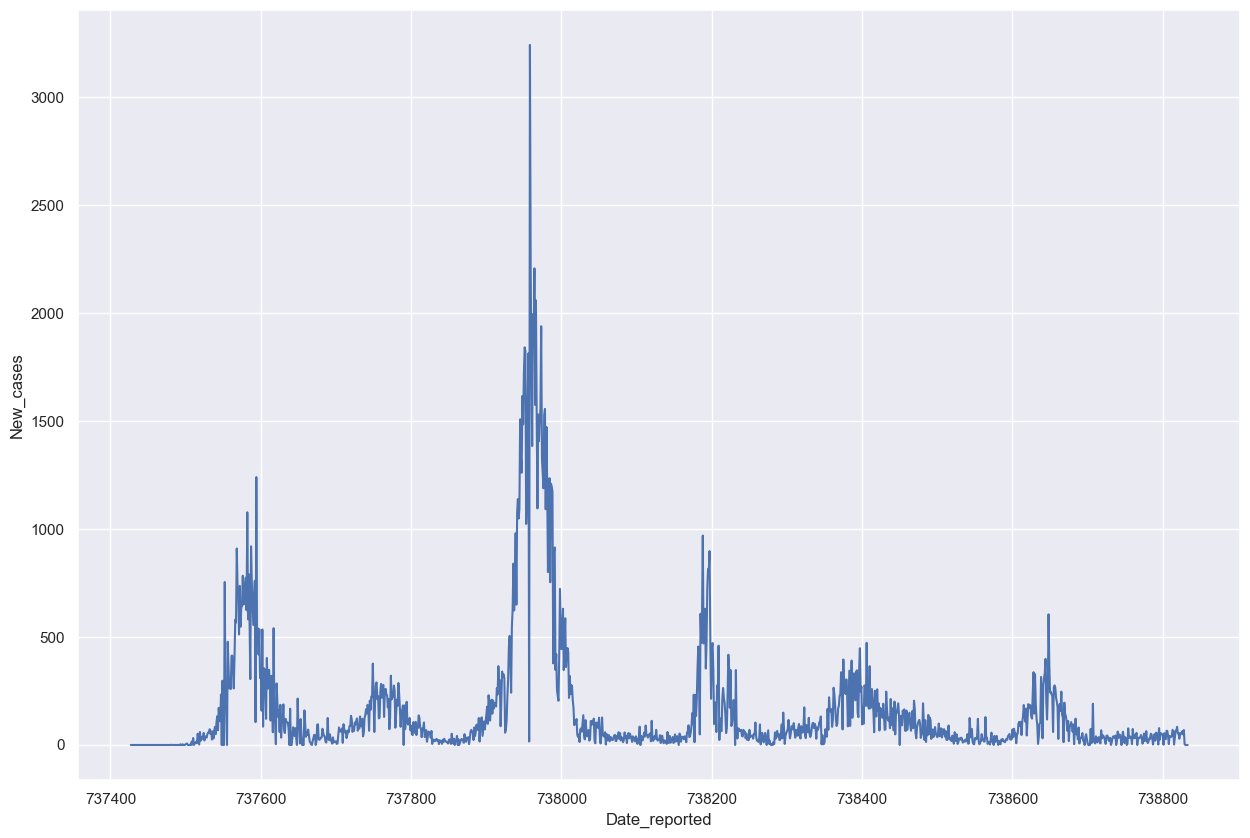

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date_reported" , y="New_cases" , data=df)
plt.show()

### Plot for New Deaths

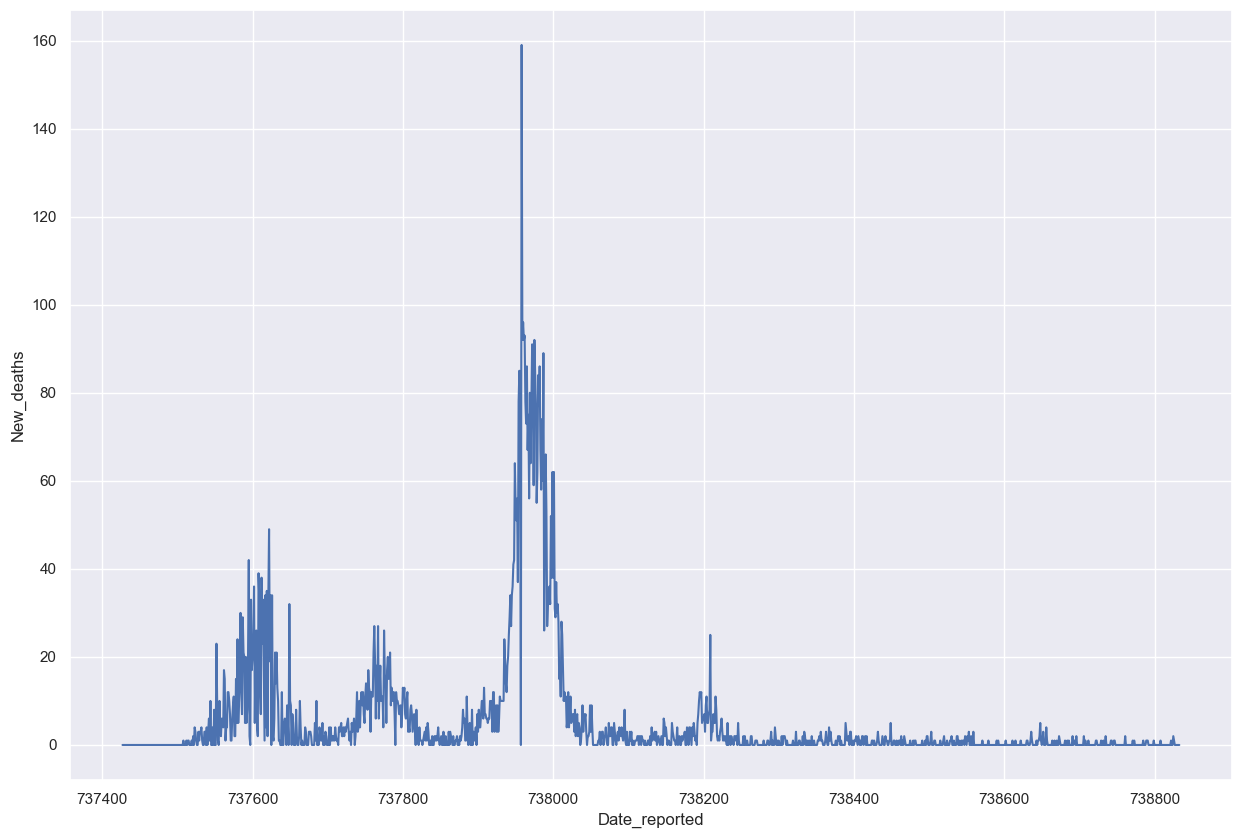

In [6]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date_reported" , y="New_deaths" , data=df)
plt.show()

### Plot for Active Cases

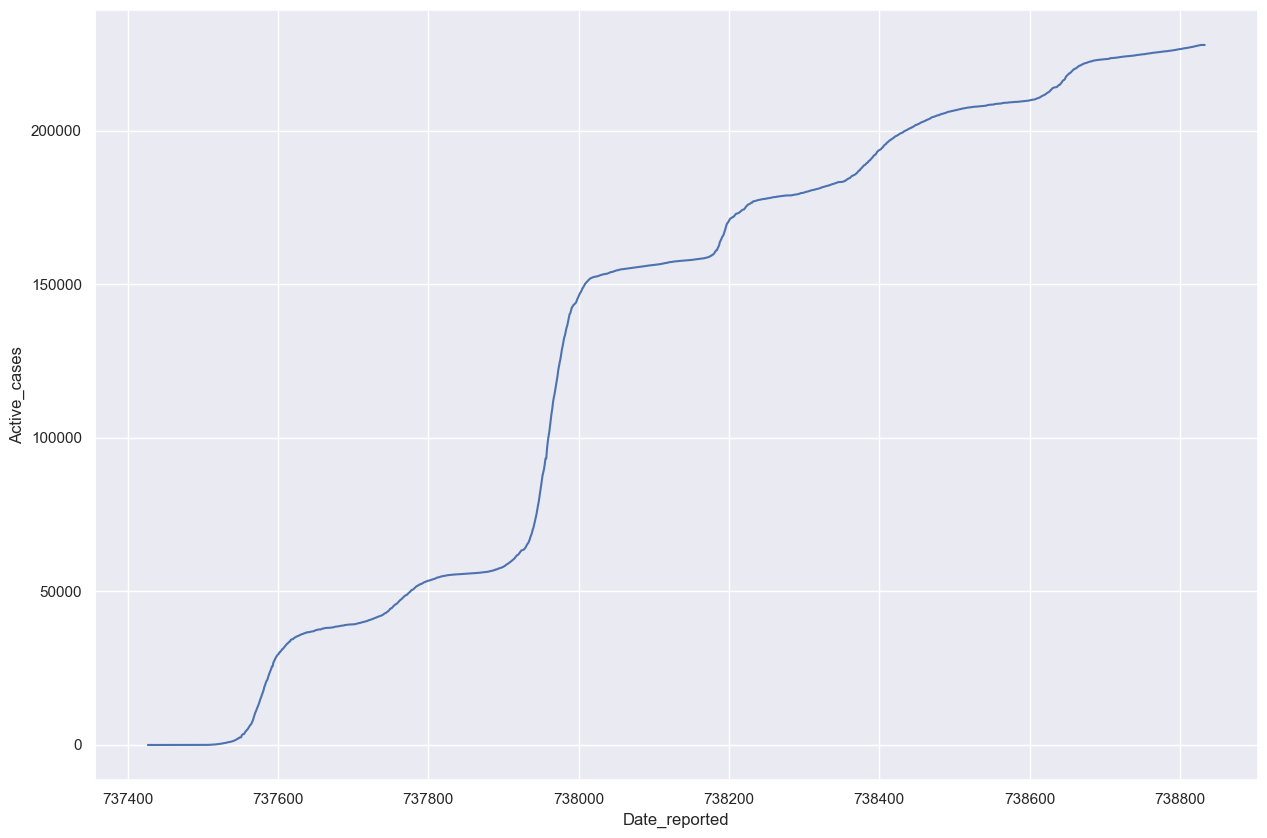

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date_reported" , y="Active_cases" , data=df)
plt.show()

### Split Train and Test data

In [8]:
X = np.array(df[['New_cases','New_deaths','Date_reported', 'Total_cases']])
y = np.array(df[['Active_cases']])

In [9]:

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=df['Country'] )

print ("\n\n ----------------- X train & test shape -----------------")
print(X_train.shape , X_test.shape)
print ("\n\n ----------------- Y train & test shape -----------------")
print(X_train.shape , X_test.shape)



 ----------------- X train & test shape -----------------
(1195, 4) (212, 4)


 ----------------- Y train & test shape -----------------
(1195, 4) (212, 4)


In [10]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest Classifier



 ----------------- Random Forest Classifier -----------------
##############################################################

Train Accuracy -  0.8908974803484041
Test Accuracy -  0.934219859308676
##############################################################



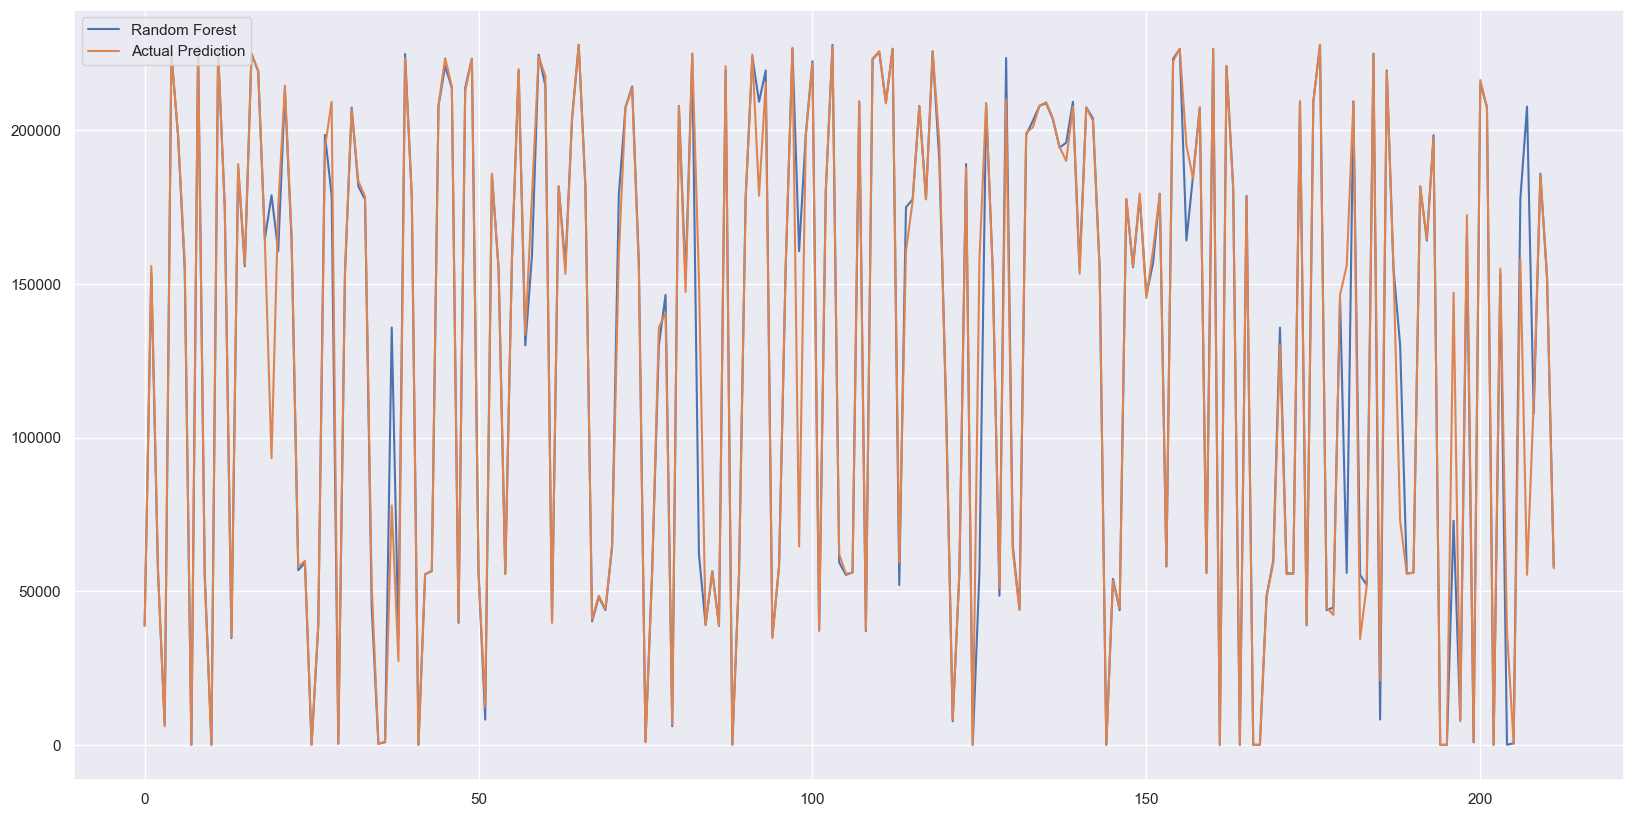

In [11]:

rfc_model = RandomForestClassifier(class_weight='balanced',max_depth=5,max_features='sqrt',n_estimators=300,random_state=24)
rfc_model.fit(X_train, y_train.ravel())
rfc_scores = cross_val_score(rfc_model, X_train, y_train.ravel() , scoring="r2")
rfc_predict = cross_val_predict(rfc_model , X_test, y_test.ravel())
rfc_score_test = cross_val_score(rfc_model , X_test , y_test.ravel(), scoring="r2")

print ("\n\n ----------------- Random Forest Classifier -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(rfc_scores)}')
print(f'Test Accuracy -  {np.mean(rfc_score_test)}')
print ('##############################################################\n')
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(rfc_predict , label="Random Forest")
plt.plot(y_test , label="Actual Prediction")
plt.legend(loc="upper left")
plt.show()

### Logestic Regression Model



 ----------------- Logistic Regression Model -----------------
##############################################################

Train Accuracy -  1.0
Test Accuracy -  1.0
##############################################################



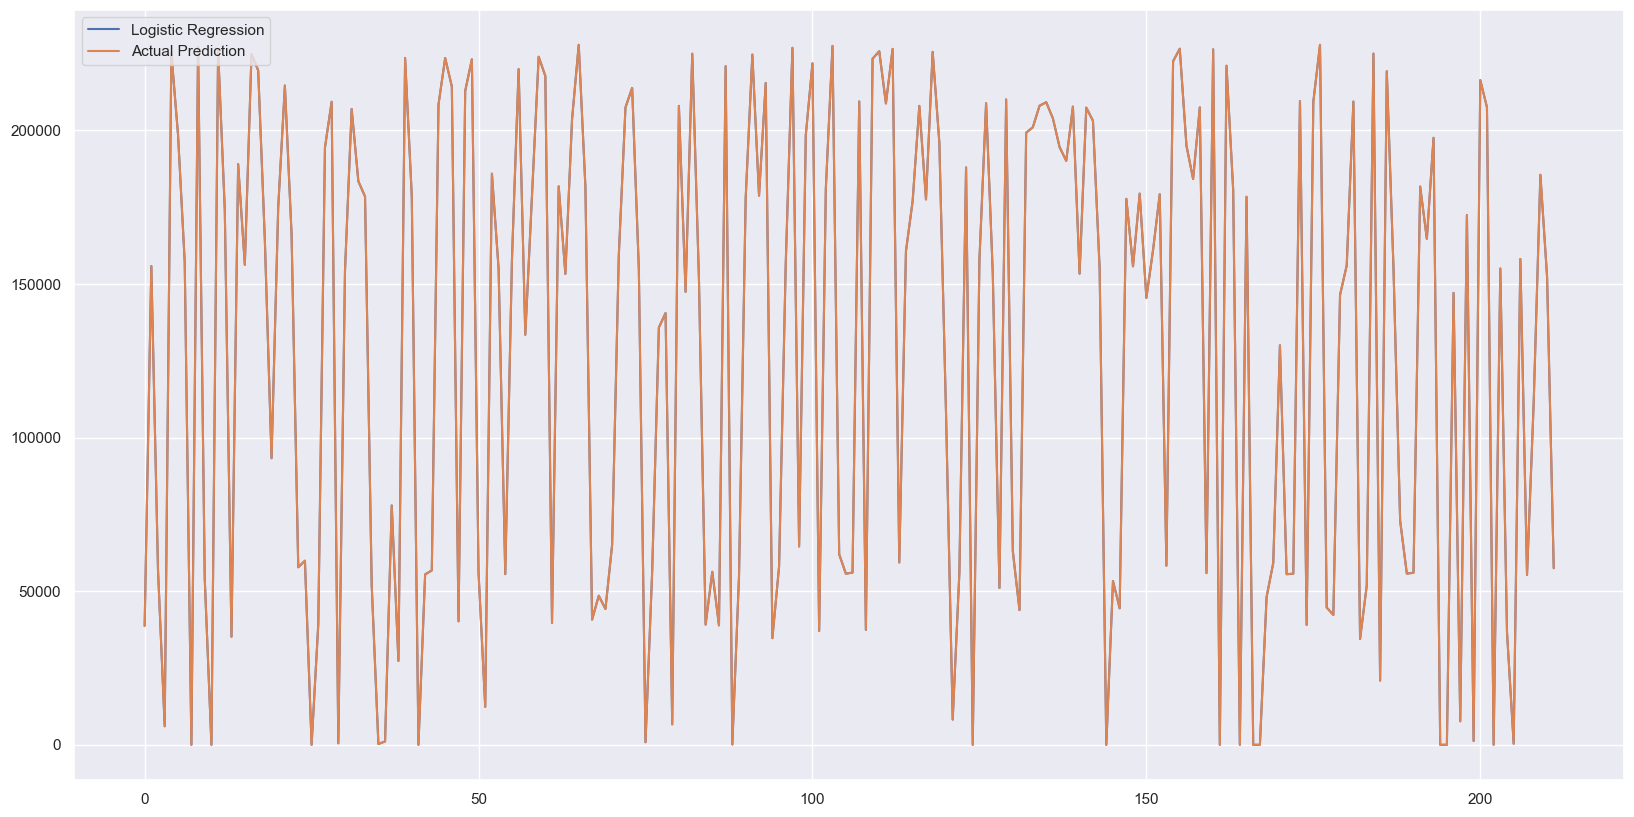

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)
lr_scores = cross_val_score(lr_model, X_train, y_train , scoring="r2", cv=10)
lr_predict = cross_val_predict(lr_model , X_test, y_test)
lr_score_test = cross_val_score(lr_model , X_test , y_test , cv=10)

print ("\n\n ----------------- Logistic Regression Model -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(lr_scores)}')
print(f'Test Accuracy -  {np.mean(lr_score_test)}')
print ('##############################################################\n')
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(lr_predict , label="Logistic Regression")
plt.plot(y_test , label="Actual Prediction")
plt.legend(loc="upper left")
plt.show()

### SVM Model 



 ----------------- SVM Model -----------------
##############################################################

Train Accuracy -  0.9686586143576926
Test Accuracy -  0.9805700174323562
##############################################################



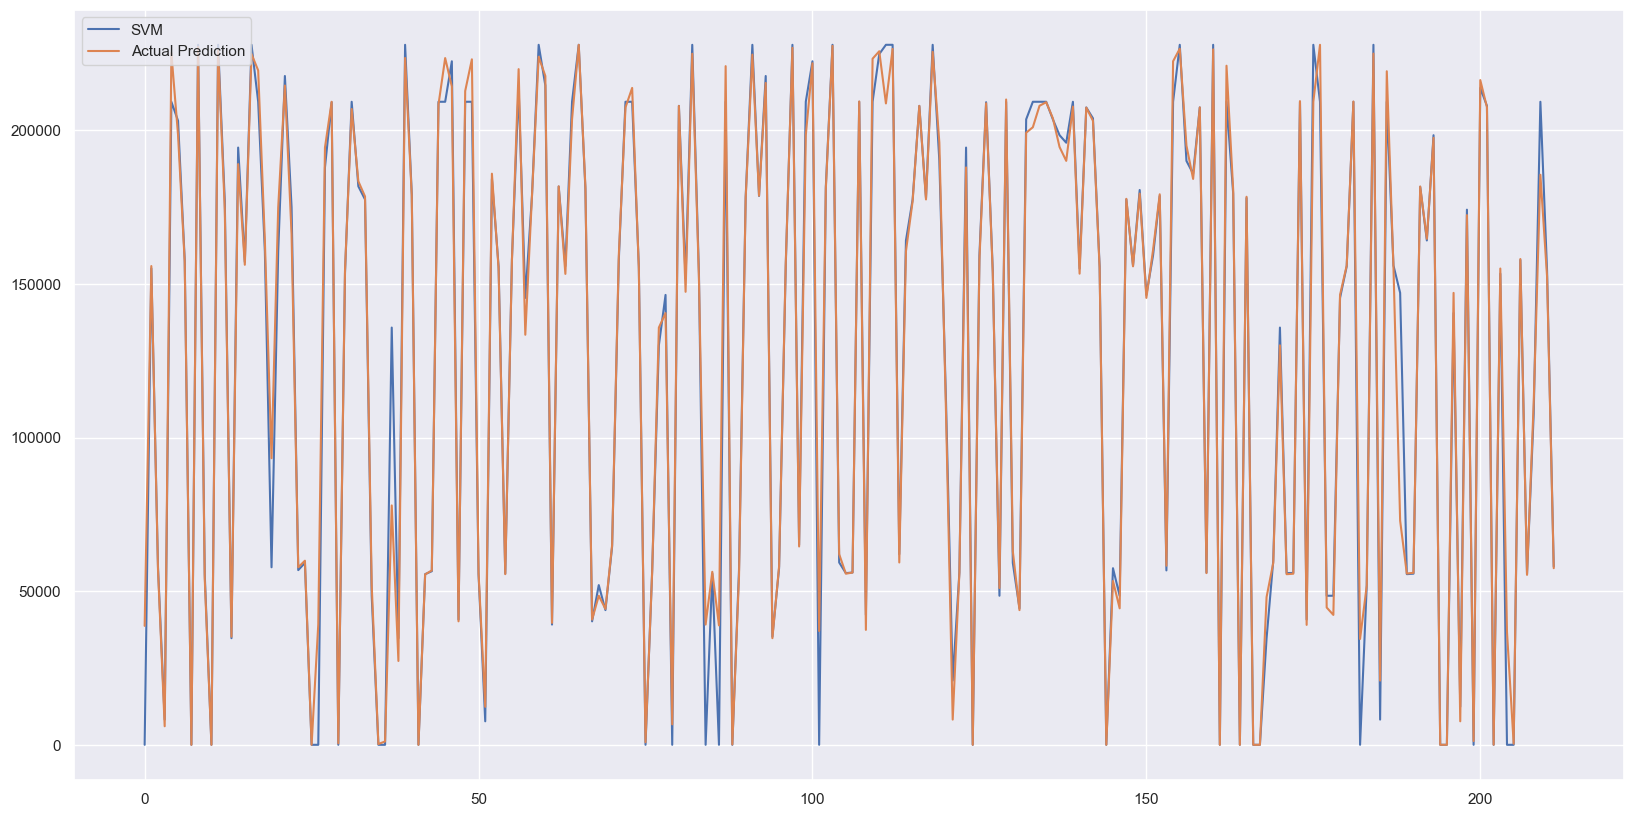

In [13]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train , y_train.ravel())
svc_scores = cross_val_score(svc_model, X_train, y_train.ravel() , scoring="r2" , cv=5)
svc_predict = cross_val_predict(svc_model , X_test, y_test.ravel())
svc_score_test = cross_val_score(svc_model , X_test , y_test.ravel()  , scoring="r2",cv=5)

print ("\n\n ----------------- SVM Model -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(svc_scores)}')
print(f'Test Accuracy -  {np.mean(svc_score_test)}')
print ('##############################################################\n')
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(svc_predict , label="SVM")
plt.plot(y_test , label="Actual Prediction")
plt.legend(loc="upper left")
plt.show()

### ANN MLP Classifier



 ----------------- MLP Classifier Model -----------------
##############################################################

Train Accuracy -  0.9954228934763029
Test Accuracy -  0.9492303179141764
##############################################################



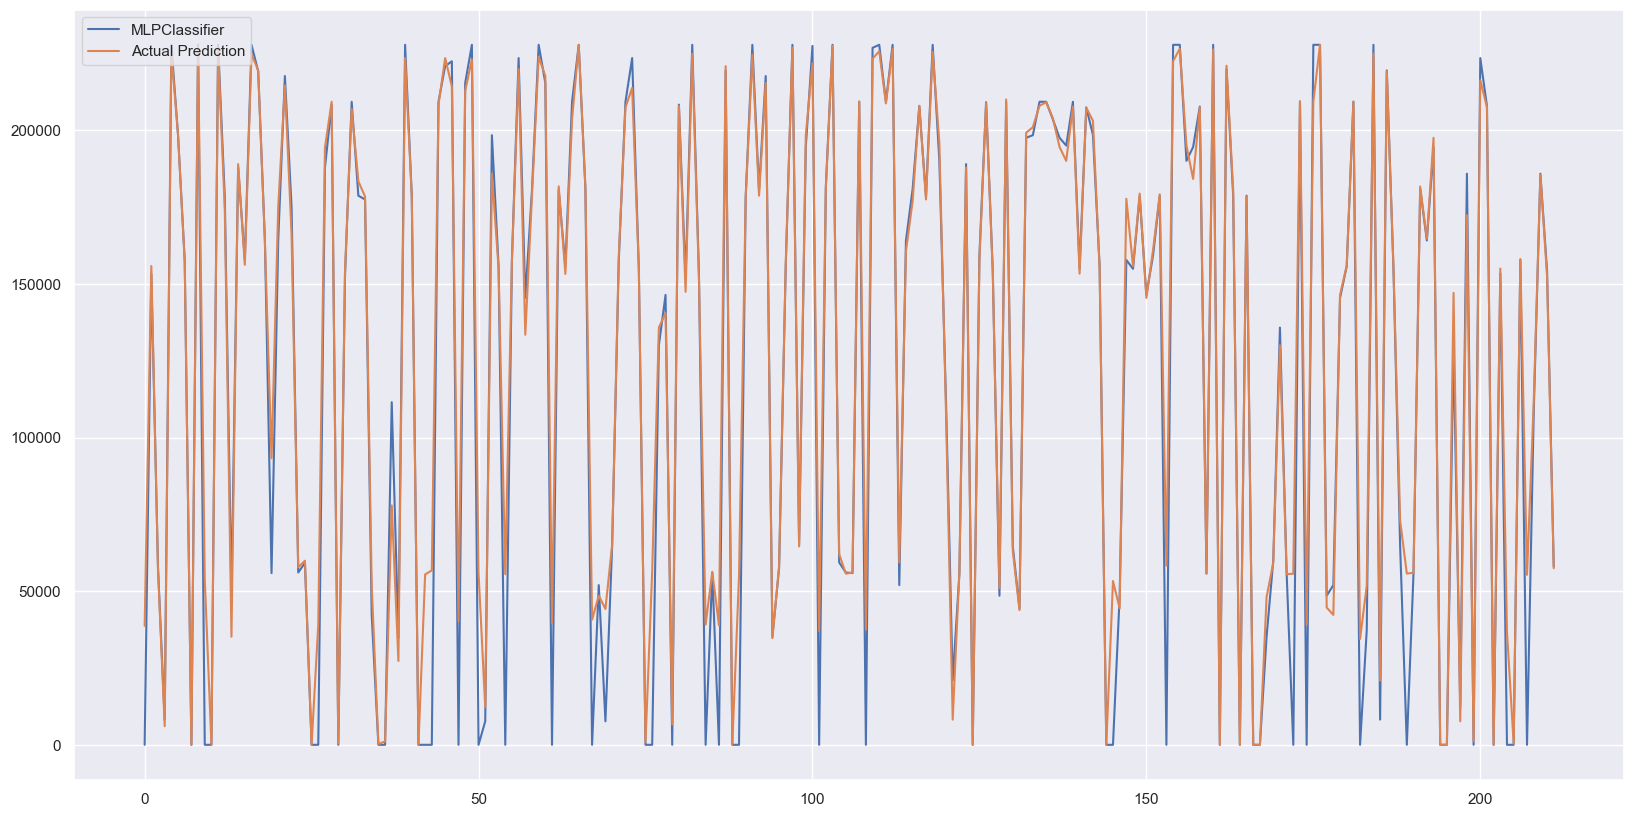

In [14]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)
mlp_model.fit(X_train , y_train.ravel())
mlp_scores = cross_val_score(mlp_model, X_train, y_train.ravel() , scoring="r2" , cv=5)
mlp_predict = cross_val_predict(mlp_model , X_test, y_test.ravel())
mlp_score_test = cross_val_score(mlp_model , X_test , y_test.ravel()  , scoring="r2",cv=5)

print ("\n\n ----------------- MLP Classifier Model -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(mlp_scores)}')
print(f'Test Accuracy -  {np.mean(mlp_score_test)}')
print ('##############################################################\n')
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(mlp_predict , label="MLPClassifier")
plt.plot(y_test , label="Actual Prediction")
plt.legend(loc="upper left")
plt.show()

### Ada Boost Classifier



 ----------------- AdaBoost Classifier Model -----------------
##############################################################

Train Accuracy -  0.9520823870390501
Test Accuracy -  0.9170753719631302
##############################################################



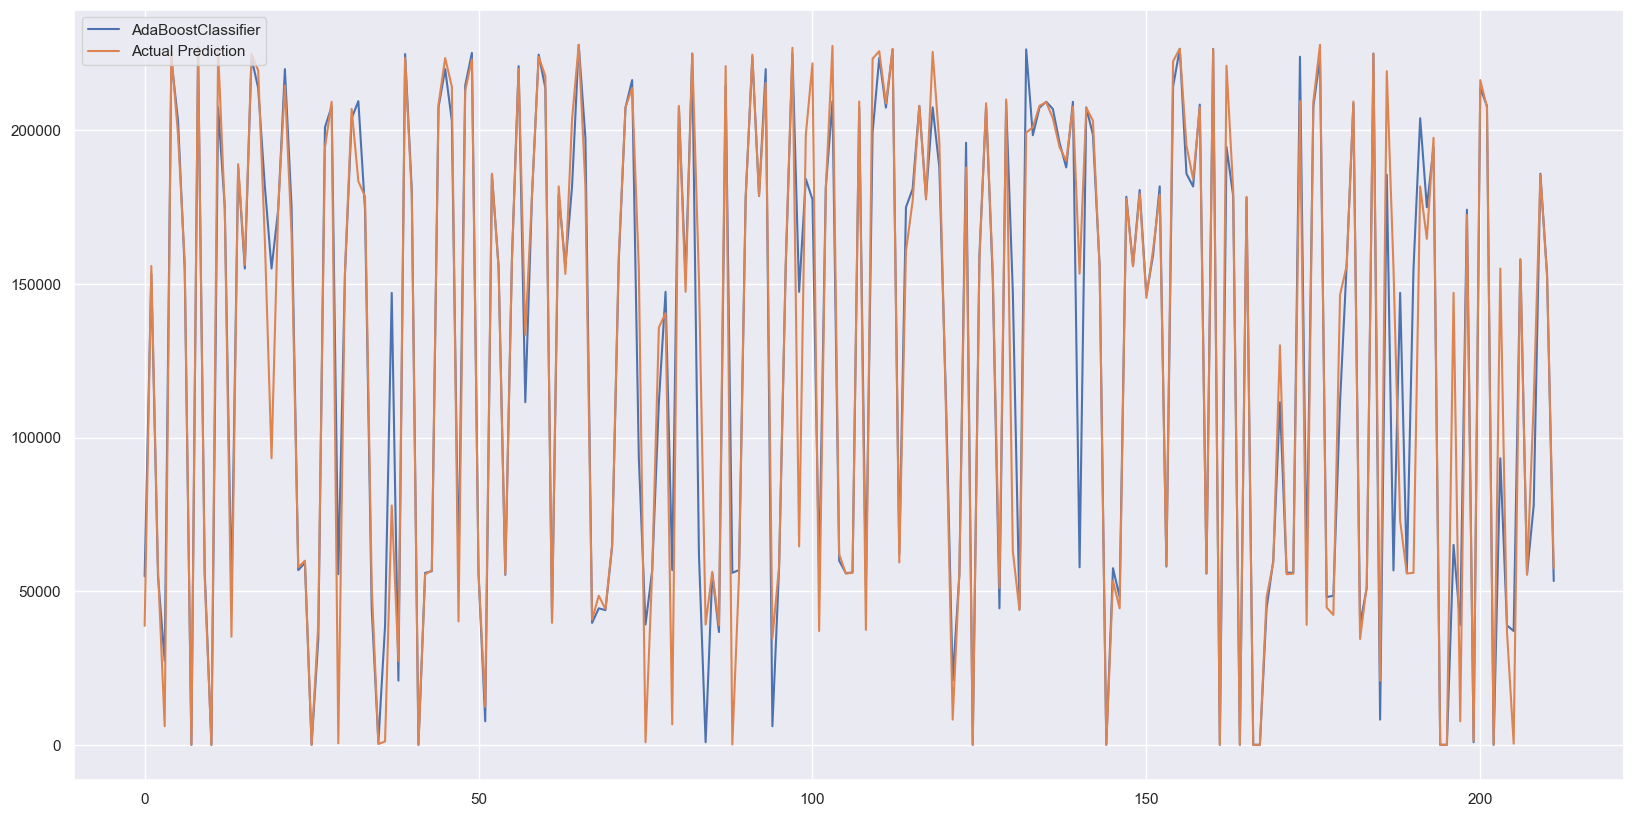

In [15]:
ab_model = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ab_model.fit(X_train , y_train.ravel())
ab_scores = cross_val_score(ab_model, X_train, y_train.ravel() , scoring="r2" , cv=5)
ab_predict = cross_val_predict(ab_model , X_test, y_test.ravel())
ab_score_test = cross_val_score(ab_model , X_test , y_test.ravel()  , scoring="r2",cv=5)

print ("\n\n ----------------- AdaBoost Classifier Model -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(ab_scores)}')
print(f'Test Accuracy -  {np.mean(ab_score_test)}')
print ('##############################################################\n')
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(ab_predict , label="AdaBoostClassifier")
plt.plot(y_test , label="Actual Prediction")
plt.legend(loc="upper left")
plt.show()

### Decision Tree Classifier



 ----------------- DecisionTree Classifier Model -----------------
##############################################################

Train Accuracy -  0.7341523152887629
Test Accuracy -  0.8284220138246887
##############################################################



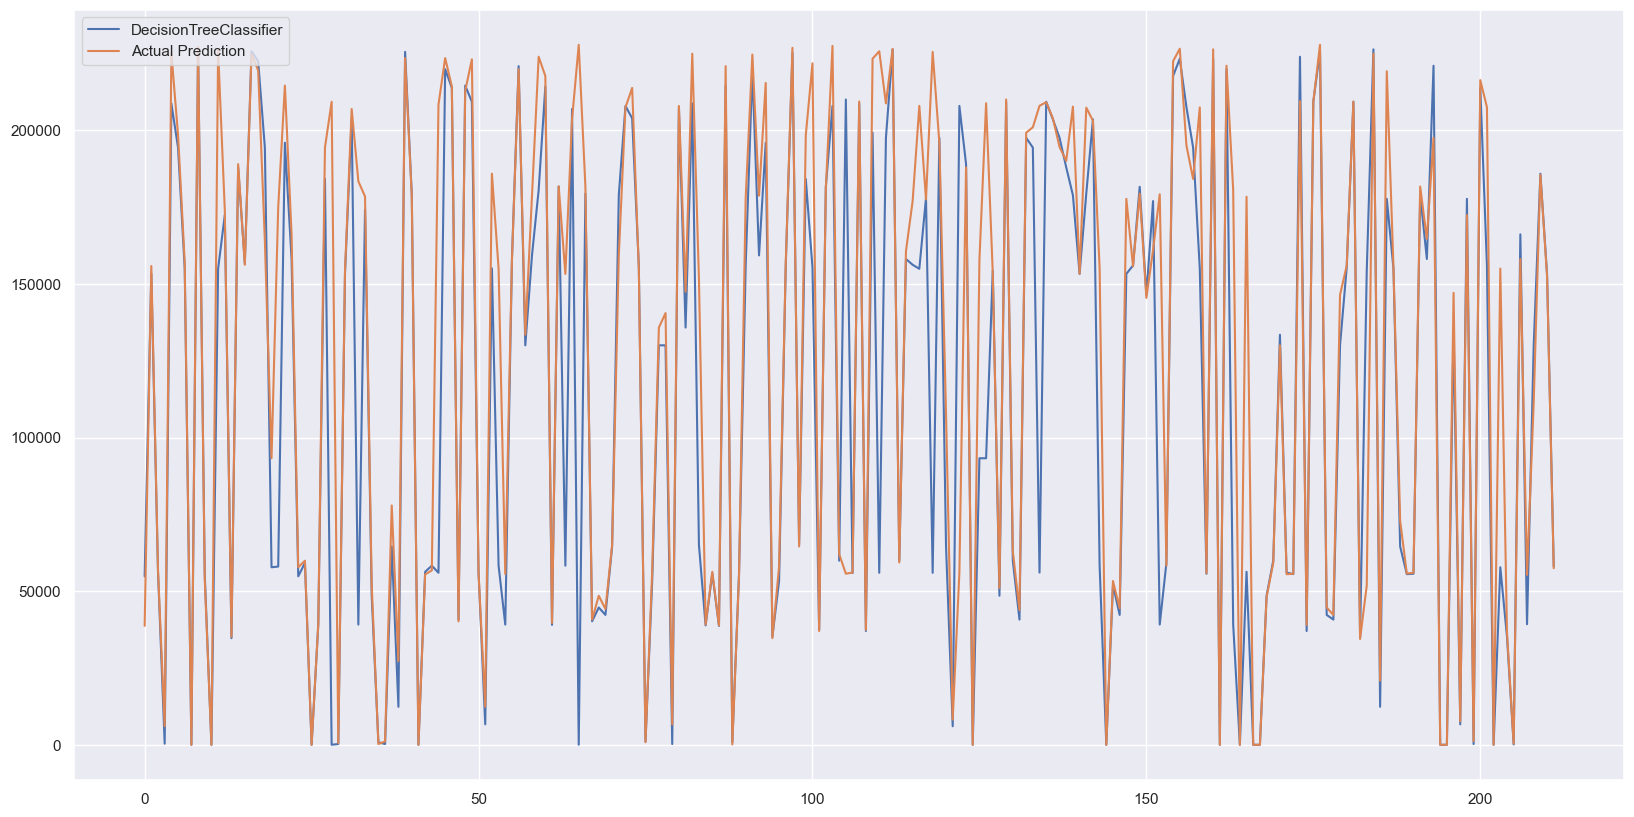

In [16]:
dt_model = tree.DecisionTreeClassifier(
    # max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dt_model.fit(X_train , y_train.ravel())
dt_scores = cross_val_score(dt_model, X_train, y_train.ravel() , scoring="r2" , cv=5)
dt_predict = cross_val_predict(dt_model , X_test, y_test.ravel())
dt_score_test = cross_val_score(dt_model , X_test , y_test.ravel()  , scoring="r2",cv=5)

print ("\n\n ----------------- DecisionTree Classifier Model -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(dt_scores)}')
print(f'Test Accuracy -  {np.mean(dt_score_test)}')
print ('##############################################################\n')
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(dt_predict , label="DecisionTreeClassifier")
plt.plot(y_test , label="Actual Prediction")
plt.legend(loc="upper left")
plt.show()

In [17]:

desired = df.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
counts = df.groupby(['timestamp_trunc'])[desired].sum()
counts = counts[['Active_cases']]
counts_dict = counts['Active_cases'].to_dict()
counts_dict

{Timestamp('2020-01-03 00:00:00'): 0,
 Timestamp('2020-01-04 00:00:00'): 0,
 Timestamp('2020-01-05 00:00:00'): 0,
 Timestamp('2020-01-06 00:00:00'): 0,
 Timestamp('2020-01-07 00:00:00'): 0,
 Timestamp('2020-01-08 00:00:00'): 0,
 Timestamp('2020-01-09 00:00:00'): 0,
 Timestamp('2020-01-10 00:00:00'): 0,
 Timestamp('2020-01-11 00:00:00'): 0,
 Timestamp('2020-01-12 00:00:00'): 0,
 Timestamp('2020-01-13 00:00:00'): 0,
 Timestamp('2020-01-14 00:00:00'): 0,
 Timestamp('2020-01-15 00:00:00'): 0,
 Timestamp('2020-01-16 00:00:00'): 0,
 Timestamp('2020-01-17 00:00:00'): 0,
 Timestamp('2020-01-18 00:00:00'): 0,
 Timestamp('2020-01-19 00:00:00'): 0,
 Timestamp('2020-01-20 00:00:00'): 0,
 Timestamp('2020-01-21 00:00:00'): 0,
 Timestamp('2020-01-22 00:00:00'): 0,
 Timestamp('2020-01-23 00:00:00'): 0,
 Timestamp('2020-01-24 00:00:00'): 0,
 Timestamp('2020-01-25 00:00:00'): 0,
 Timestamp('2020-01-26 00:00:00'): 0,
 Timestamp('2020-01-27 00:00:00'): 0,
 Timestamp('2020-01-28 00:00:00'): 0,
 Timestamp('

In [18]:
data = pd.DataFrame()
data['time'] = pd.date_range(min(counts.index), max(counts.index), freq = 'M')
data.set_index('time')
data['time_sec'] = (data.time - min(data.time)).dt.total_seconds()
data['signal'] = data.time.apply(lambda x: counts_dict[x] if x in counts_dict.keys() else 0)

In [19]:
# time_sec is the hourly timestamp converted to seconds
X = pd.DataFrame(data['time_sec']) 
# signal is how many calls were made in that hour
y = pd.DataFrame(data['signal']) 

In [20]:
model = LinearRegression()
model.fit(X, y) 
data['pred_signal_linreg'] = model.predict(X)
data['residuals'] = data['signal'] - data['pred_signal_linreg']

time = data['time']
residuals = data['residuals']

In [21]:

print('Slope: {:.2e}, Intercept: {:.2f}'.format(model.coef_[0,0], model.intercept_[0]))
print('R-squared: {:.2e}'.format(model.score(X,y)))

Slope: 2.19e-03, Intercept: 3023.77
R-squared: 9.35e-01


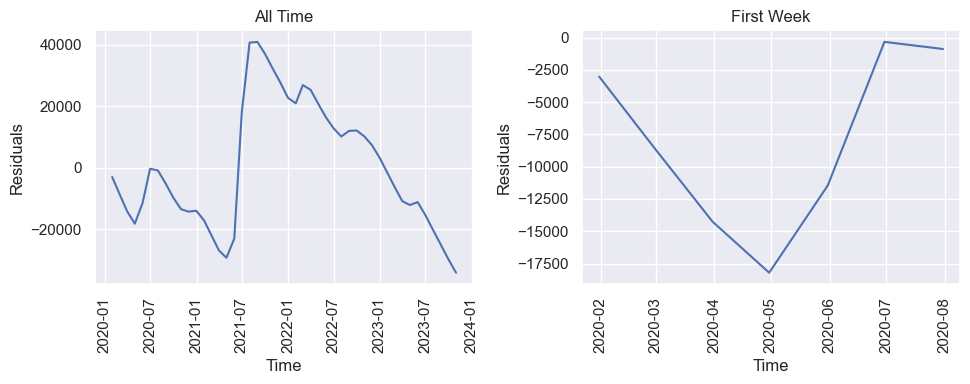

In [22]:
plt.figure(figsize=(10, 4))

ax1 = plt.subplot( 1, 2, 1 )
ax1.plot(time, residuals, label='residuals')
ax1.set_title('All Time')
ax1.set_ylabel( 'Residuals' )
ax1.set_xlabel( 'Time' )
plt.xticks(rotation=90)

N =  7

ax2 = plt.subplot( 1, 2, 2 )
ax2.plot(time[:N], residuals[:N])
ax2.set_title('First Week')
ax2.set_ylabel( 'Residuals' )
ax2.set_xlabel( 'Time' )

plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

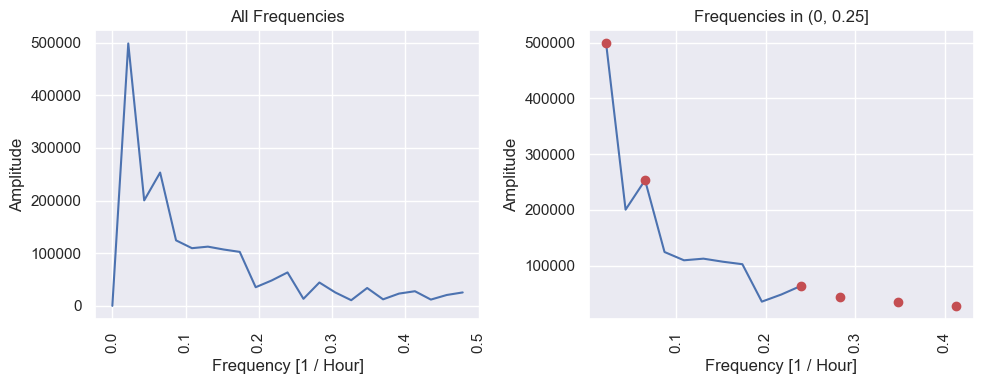

In [23]:
fft_output = fft.fft(residuals.values)
power = np.abs(fft_output)
freq = fft.fftfreq(len(residuals))

mask = freq >= 0
freq = freq[mask]
power = power[mask]

plt.figure( figsize=(10, 4) )

ax1 = plt.subplot( 1, 2, 1 )
ax1.plot(freq, power, label='residuals')
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency [1 / Hour]' )
plt.xticks(rotation=90)

ax2 = plt.subplot( 1, 2, 2 )
mask = (freq > 0) & (freq <= 0.25)
ax2.plot(freq[mask], power[mask])
ax2.set_title('Frequencies in (0, 0.25]')
ax2.set_ylabel( 'Amplitude' )
ax2.set_xlabel( 'Frequency [1 / Hour]' )

peaks = sig.find_peaks(power[freq >=0], prominence=10**4)[0]
peak_freq =  freq[peaks]
peak_power = power[peaks]
plt.plot(peak_freq, peak_power, 'ro')

plt.tight_layout()
plt.xticks(rotation=90)

In [24]:
output = pd.DataFrame()
output['index'] = peaks
output['freq (1/hour)'] = peak_freq
output['amplitude'] = peak_power
output['period (days)'] = 1 / peak_freq / 24
output['fft'] = fft_output[peaks]
output = output.sort_values('amplitude', ascending=False)

output

,index,freq (1/hour),amplitude,period (days),fft
0,1,0.021739,498634.984420,1.916667,-484577.547894+117564.653552j
1,3,0.065217,253337.971362,0.638889,-127842.509631-218715.386896j
2,11,0.239130,63566.834781,0.174242,17287.806328- 61170.861008j
3,13,0.282609,44423.475576,0.147436,37036.778932- 24530.026266j
4,16,0.347826,33983.773086,0.119792,33830.147728- 3227.683050j
5,19,0.413043,27839.231620,0.100877,24078.354925- 13973.390473j


In [25]:
from cmath import phase

fourier_terms = pd.DataFrame()
fourier_terms['fft'] = output['fft']
fourier_terms['freq (1 / hour)'] = output['freq (1/hour)']
fourier_terms['amplitude'] = fourier_terms.fft.apply(lambda z: abs(z)) 
fourier_terms['phase'] = fourier_terms.fft.apply(lambda z: phase(z))
fourier_terms.sort_values(by=['amplitude'], ascending=[0])

# Create some helpful labels (FT_1..FT_N)
fourier_terms['label'] = list(map(lambda n : 'FT_{}'.format(n), range(1, len(fourier_terms) + 1)))

# Turn our dataframe into a dictionary for easy lookup
fourier_terms = fourier_terms.set_index('label')
fourier_terms_dict = fourier_terms.to_dict('index')

fourier_terms

,fft,freq (1 / hour),amplitude,phase
label,,,,
FT_1,-484577.547894+117564.653552j,0.021739,498634.984420,2.903579
FT_2,-127842.509631-218715.386896j,0.065217,253337.971362,-2.099752
FT_3,17287.806328- 61170.861008j,0.239130,63566.834781,-1.295364
FT_4,37036.778932- 24530.026266j,0.282609,44423.475576,-0.584984
FT_5,33830.147728- 3227.683050j,0.347826,33983.773086,-0.095121
FT_6,24078.354925- 13973.390473j,0.413043,27839.231620,-0.525831


In [26]:
for key in fourier_terms_dict.keys():
    a = fourier_terms_dict[key]['amplitude']
    w = 2 * math.pi * (fourier_terms_dict[key]['freq (1 / hour)'] / 3600)
    p = fourier_terms_dict[key]['phase']
    data[key] = data['time_sec'].apply(lambda t: a * math.cos(w*t + p))

data['FT_All'] = 0
for column in list(fourier_terms.index):
    data['FT_All'] = data['FT_All'] + data[column]


# Sample 
data[['signal', 'time_sec', 'FT_All']  + list(fourier_terms.index)]

,signal,time_sec,FT_All,FT_1,FT_2,FT_3,FT_4,FT_5,FT_6
0,0,0.0,-500186.969612,-484577.547894,-127842.509631,17287.806328,37036.778932,33830.147728,24078.354925
1,1,2505600.0,-197844.655400,-416670.405392,237197.522061,8513.966350,-35516.547334,30582.186986,-21951.378071
2,113,5184000.0,-90373.387657,51498.562441,-222872.125611,40005.214051,29045.232818,20731.966813,-8782.238169
3,1827,7776000.0,-716451.223435,-434889.533997,-247104.377470,-25456.217933,-24197.763010,-8287.707144,23484.376119
4,14441,10454400.0,-197844.655400,-416670.405392,237197.522061,8513.966350,-35516.547334,30582.186986,-21951.378071
5,31234,13046400.0,227996.192708,16515.465657,252408.145866,-52014.539486,38819.174826,-33954.554691,6222.500537
6,36542,15724800.0,-716451.223435,-434889.533997,-247104.377470,-25456.217933,-24197.763010,-8287.707144,23484.376119
7,38143,18403200.0,-197844.655400,-416670.405392,237197.522061,8513.966350,-35516.547334,30582.186986,-21951.378071
8,39252,20995200.0,227996.192708,16515.465657,252408.145866,-52014.539486,38819.174826,-33954.554691,6222.500537
9,41333,23673600.0,-716451.223435,-434889.533997,-247104.377470,-25456.217933,-24197.763010,-8287.707144,23484.376119


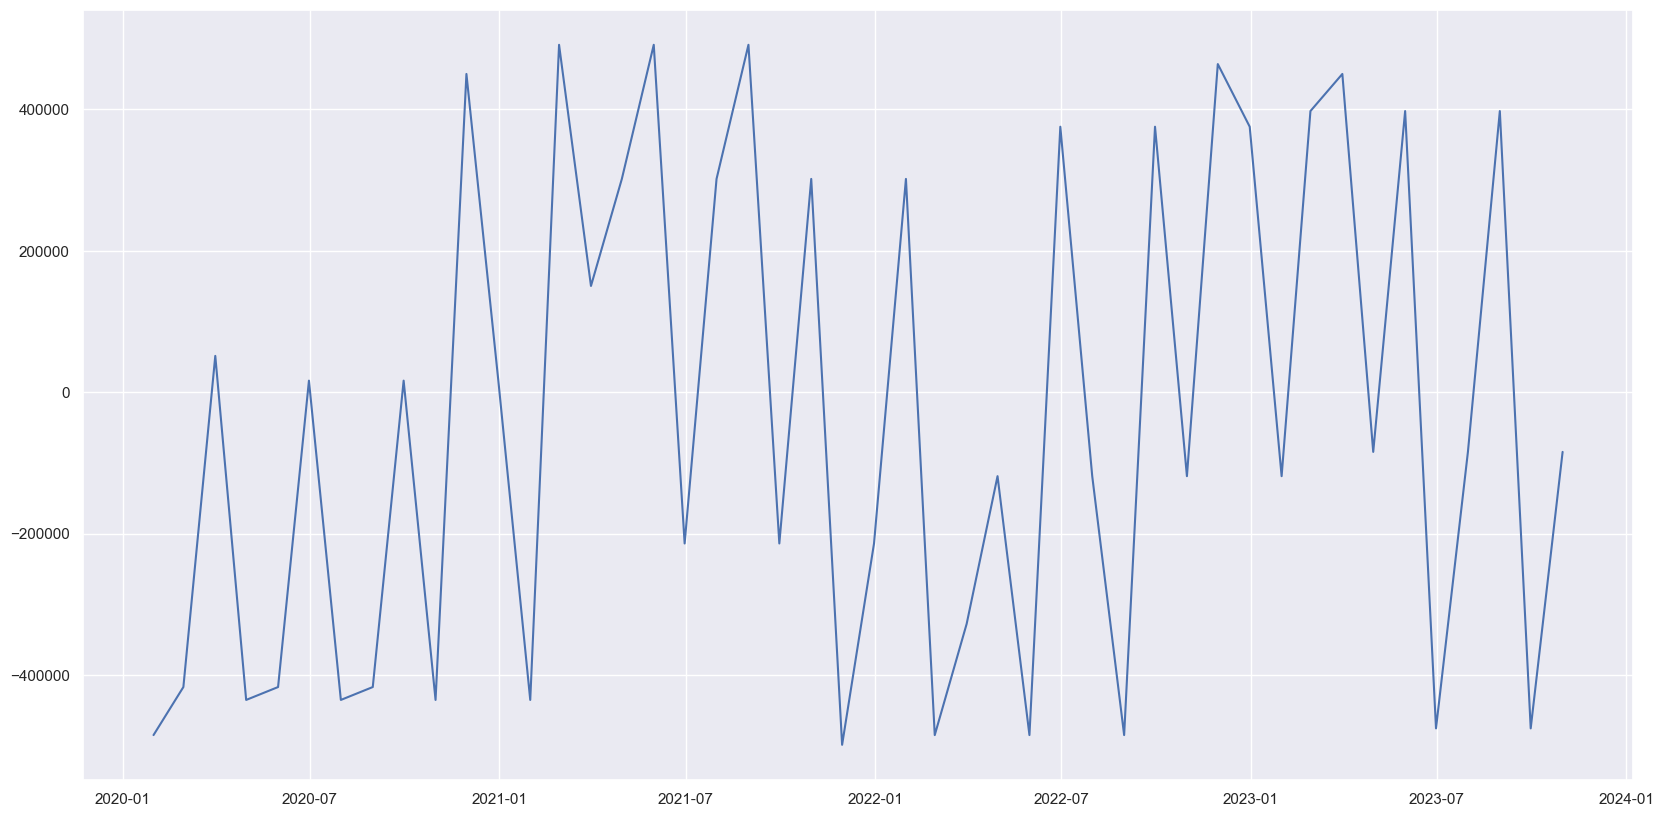

In [47]:
# Check the first Fourier term, which should have a period = 1 day
plt.plot(data['time'][:24*5], data['FT_1'][:24*5])

In [50]:
# time_sec is the hourly timestamp converted to seconds
# list(fourier_terms.index) are the names of our Fourier terms
# X = pd.DataFrame(data[['time_sec'] + list(fourier_terms.index)]) 
X = pd.DataFrame(data[['time_sec', 'FT_All']]) 
# signal is how many calls were made in that hour
y = pd.DataFrame(data['signal']) 

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
y_pred

array([[2715.630758],
       [8464.087780],
       [14414.798078],
       [19516.333716],
       [25837.145865],
       [31885.613210],
       [36889.391802],
       [43210.203951],
       [49258.671296],
       [54262.449888],
       [60679.976193],
       [66631.729382],
       [71635.507974],
       [77935.163847],
       [83773.342196],
       [89553.039182],
       [95308.221933],
       [100331.864811],
       [106926.097268],
       [112681.280019],
       [117704.922897],
       [124299.155354],
       [129053.563549],
       [135077.980983],
       [141672.213439],
       [146043.359967],
       [152152.525824],
       [158054.350333],
       [163416.418053],
       [169696.271869],
       [175427.408419],
       [180789.476138],
       [187069.329955],
       [192800.466505],
       [199113.096453],
       [204442.388041],
       [210173.524590],
       [215952.936251],
       [221380.763487],
       [226638.958771],
       [233325.994337],
       [238228.571664],
       [244

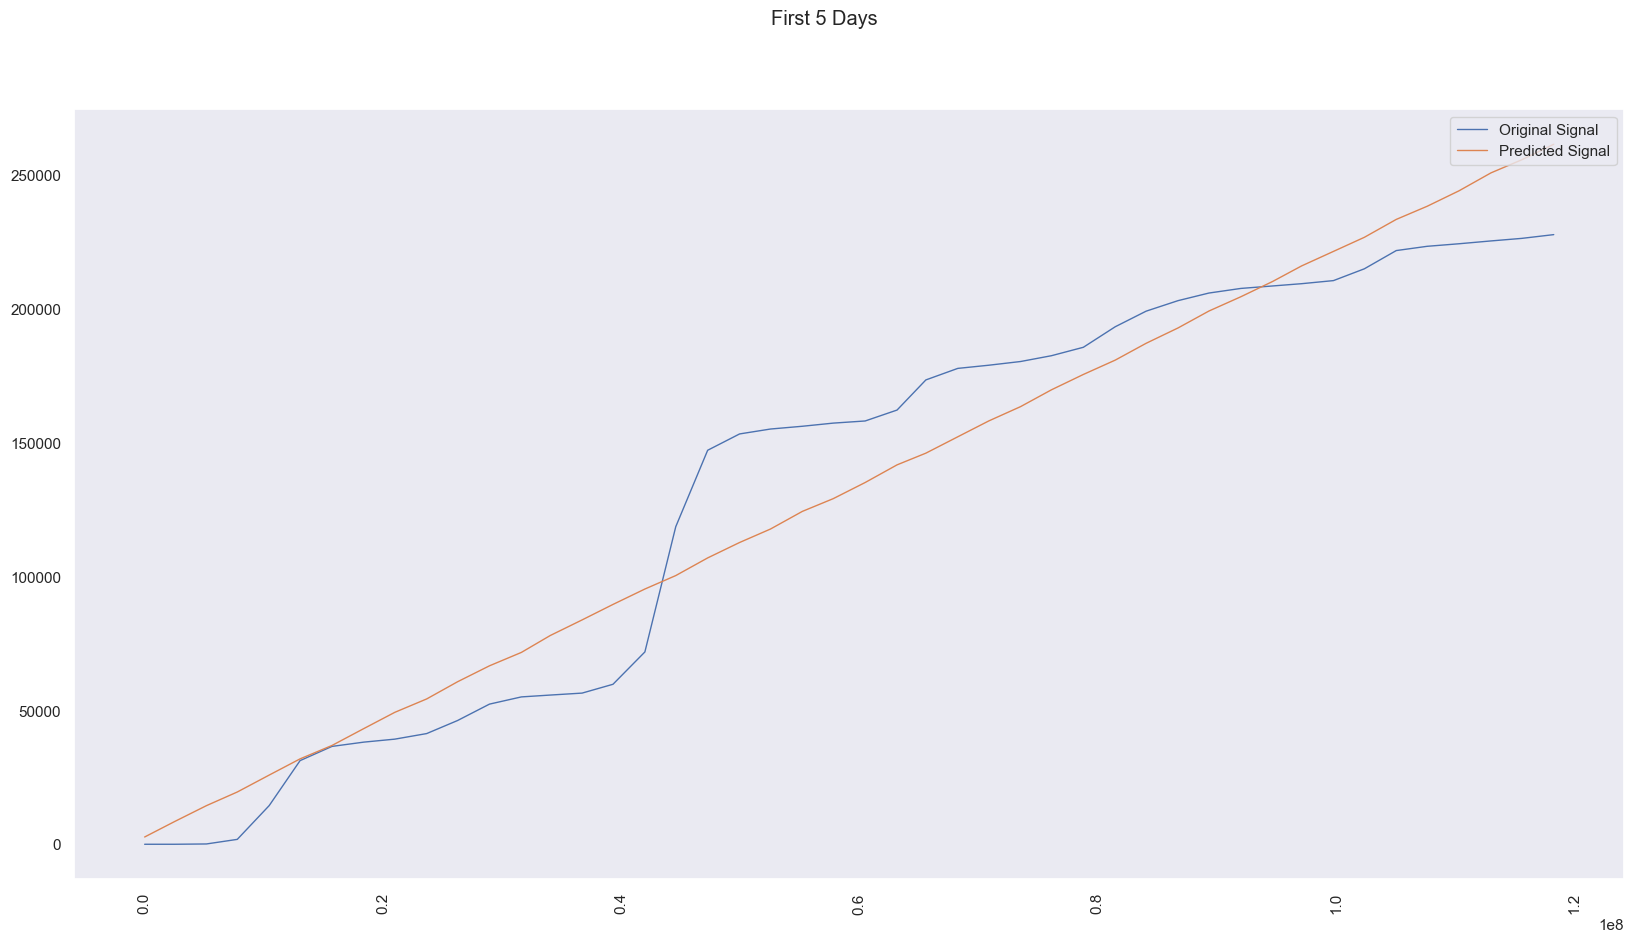

In [51]:



N = 24 * 5

plt.plot(X['time_sec'][:N], y[:N], linewidth=1, label='Original Signal')
plt.plot(X['time_sec'][:N], y_pred[:N], linewidth=1, label='Predicted Signal')
plt.legend(loc='upper right')
plt.suptitle('First 5 Days')
plt.grid()
plt.xticks(rotation=90)

print()